# CLUSTERING THE MILITARY POWERS OF COUNTRIES
# Ülkelerin silahlanma güçlerine göre Kümeleme

In [40]:
#KMeans: En yakın komşu kümelemesi

In [41]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

#clustering algoritmaları
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod


#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_excel("World military power.xlsx")

In [43]:
pd.set_option('display.max_columns', None)

#kolonların tamamı görünmesi için 

In [44]:
pd.set_option('display.max_rows', None)  

#satırların tamamı görünmesi için

In [45]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [46]:
df.shape

(139, 60)

In [47]:
#Tekrar eden ülke isimleri sütunlarının temizlenmesi lazım
df.drop(df.iloc[:,2:59:2], inplace=True, axis=1)

In [48]:
df.head()

,2020 ranking,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39,Unnamed: 41,Unnamed: 43,Unnamed: 45,Unnamed: 47,Unnamed: 49,Unnamed: 51,Unnamed: 53,Unnamed: 55,Unnamed: 57,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369


In [49]:
df.shape

(139, 31)

In [50]:
# 0.ncı satırın silinip sütun isimleri olarak atanması için 
df.columns=df.loc[0]
df.drop([0], axis=0, inplace=True)

In [51]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


In [52]:
df.rename(columns={'Military Strength':'Countries'}, inplace=True)

#İlk sütunda ülekelerin adları  yazdığı için  Countries  olarak değiştirdik

In [53]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


In [54]:
df

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN


In [55]:
df.isnull().sum()

0
Countries                                   0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value            

In [56]:
# Sütun isimlerini düzenlemek için
df.columns=(df.columns).str.replace(' ','')



In [57]:
df

,Countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN


In [58]:
df.isnull().sum()

0
Countries                                0
MilitaryStrengthPowerIndex               0
AircraftStrengthvalue                    0
Fighter/InterceptorStrengthvalue         0
AttackAircraftStrengthvalue              0
TransportAircraftFleetStrengthvalue      0
TrainerAircraftFleetvalue                0
HelicopterFleetStrengthvalue             0
AttackHelicopterFleetStrengthvalue       0
TankStrengthvalue                        0
AFV/APCStrengthvalue                     0
Self-PropelledArtilleryStrengthvalue     0
TowedArtilleryStrengthvalue              0
RocketProjectorStrengthvalue             0
NavyFleetStrengthsvalue                 14
AircraftCarrierFleetStrengthvalue       23
SubmarineFleetStrengthvalue             23
DestroyerFleetStrengthvalue             23
FrigateFleetStrengthvalue               23
defensespendingbudgetvalue               0
ExternalDebtvalue                        0
AirportTotalsvalue                       0
OilProductionvalue                       0
OilConsum

In [59]:
df.fillna(df.mean(),inplace=True)

#Boş olan değerlerin hepsini ortalama ile doldurduk

In [60]:
df.isnull().sum()

0
Countries                                0
MilitaryStrengthPowerIndex               0
AircraftStrengthvalue                    0
Fighter/InterceptorStrengthvalue         0
AttackAircraftStrengthvalue              0
TransportAircraftFleetStrengthvalue      0
TrainerAircraftFleetvalue                0
HelicopterFleetStrengthvalue             0
AttackHelicopterFleetStrengthvalue       0
TankStrengthvalue                        0
AFV/APCStrengthvalue                     0
Self-PropelledArtilleryStrengthvalue     0
TowedArtilleryStrengthvalue              0
RocketProjectorStrengthvalue             0
NavyFleetStrengthsvalue                  0
AircraftCarrierFleetStrengthvalue        0
SubmarineFleetStrengthvalue              0
DestroyerFleetStrengthvalue              0
FrigateFleetStrengthvalue                0
defensespendingbudgetvalue               0
ExternalDebtvalue                        0
AirportTotalsvalue                       0
OilProductionvalue                       0
OilConsum

In [63]:
df["TotalCoastlineCoveragevalue"] = df["TotalCoastlineCoveragevalue"].fillna(df["TotalCoastlineCoveragevalue"].mode().iloc[0])

#Boş olan değerlerin hepsini ortalama ile doldurduk


In [64]:
df.isnull().sum()

0
Countries                               0
MilitaryStrengthPowerIndex              0
AircraftStrengthvalue                   0
Fighter/InterceptorStrengthvalue        0
AttackAircraftStrengthvalue             0
TransportAircraftFleetStrengthvalue     0
TrainerAircraftFleetvalue               0
HelicopterFleetStrengthvalue            0
AttackHelicopterFleetStrengthvalue      0
TankStrengthvalue                       0
AFV/APCStrengthvalue                    0
Self-PropelledArtilleryStrengthvalue    0
TowedArtilleryStrengthvalue             0
RocketProjectorStrengthvalue            0
NavyFleetStrengthsvalue                 0
AircraftCarrierFleetStrengthvalue       0
SubmarineFleetStrengthvalue             0
DestroyerFleetStrengthvalue             0
FrigateFleetStrengthvalue               0
defensespendingbudgetvalue              0
ExternalDebtvalue                       0
AirportTotalsvalue                      0
OilProductionvalue                      0
OilConsumptionvalue             

In [65]:
df

,Countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.000000,0.000000,0.0,0.000000,0.000000,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.000000
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.000000,0.000000,0.0,0.000000,0.000000,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.000000
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.000000,0.000000,6.0,0.000000,5.000000,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.000000
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.000000,0.000000,0.0,0.000000,0.000000,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.000000
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.000000,0.000000,2.0,4.000000,0.000000,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.000000
6,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.000000,0.382609,4.8,2.052174,3.521739,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,26,0,1570.000000
7,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.000000,2.000000,6.0,2.000000,8.000000,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,3964.224806
8,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.000000,0.382609,4.8,2.052174,3.521739,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,26,0,2524.000000
9,Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.000000,0.000000,4.0,0.000000,1.000000,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600,713,0,2468.000000
10,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.000000,0.000000,0.0,0.000000,1.000000,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,3964.224806


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Countries                             138 non-null    object 
 1   MilitaryStrengthPowerIndex            138 non-null    float64
 2   AircraftStrengthvalue                 138 non-null    int64  
 3   Fighter/InterceptorStrengthvalue      138 non-null    int64  
 4   AttackAircraftStrengthvalue           138 non-null    int64  
 5   TransportAircraftFleetStrengthvalue   138 non-null    int64  
 6   TrainerAircraftFleetvalue             138 non-null    int64  
 7   HelicopterFleetStrengthvalue          138 non-null    int64  
 8   AttackHelicopterFleetStrengthvalue    138 non-null    int64  
 9   TankStrengthvalue                     138 non-null    int64  
 10  AFV/APCStrengthvalue                  138 non-null    int64  
 11  Self-PropelledArtil

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df.corr()

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,AirportTotalsvalue,TotalBorderCoveragevalue
0,,,,,,,,,,,,,,,,,,,,
MilitaryStrengthPowerIndex,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.365219,-0.152412,-0.251830,-0.161563,-0.328918,-0.173362,-0.273529
AircraftStrengthvalue,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.523896,0.912768,0.661397,0.906104,0.230470,0.884260,0.429180
Fighter/InterceptorStrengthvalue,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.659870,0.792651,0.789060,0.863013,0.444350,0.733474,0.504807
AttackAircraftStrengthvalue,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.629567,0.652048,0.756039,0.729354,0.320786,0.663088,0.614369
TransportAircraftFleetStrengthvalue,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.516570,0.864520,0.644400,0.862032,0.230439,0.874719,0.522948
TrainerAircraftFleetvalue,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.454656,0.925466,0.570113,0.876212,0.163259,0.899261,0.333502
HelicopterFleetStrengthvalue,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.464452,0.932811,0.599271,0.900809,0.158828,0.904459,0.373657
AttackHelicopterFleetStrengthvalue,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.507265,0.849673,0.677086,0.875643,0.234535,0.812823,0.460234
TankStrengthvalue,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.680912,0.361939,0.733885,0.439711,0.319557,0.346984,0.482693


In [70]:
df.describe()

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,AirportTotalsvalue,TotalBorderCoveragevalue
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,84.983871,0.382609,4.800000,2.052174,3.521739,290.043478,3964.224806
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,138.447333,1.798550,12.503547,9.122718,5.912189,1212.967393,3634.494855
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,12.750000,0.000000,0.000000,0.000000,0.000000,33.500000,1602.500000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,48.000000,0.000000,0.000000,0.000000,2.000000,68.000000,3194.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,84.983871,0.382609,4.800000,1.500000,4.000000,150.750000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,22457.000000


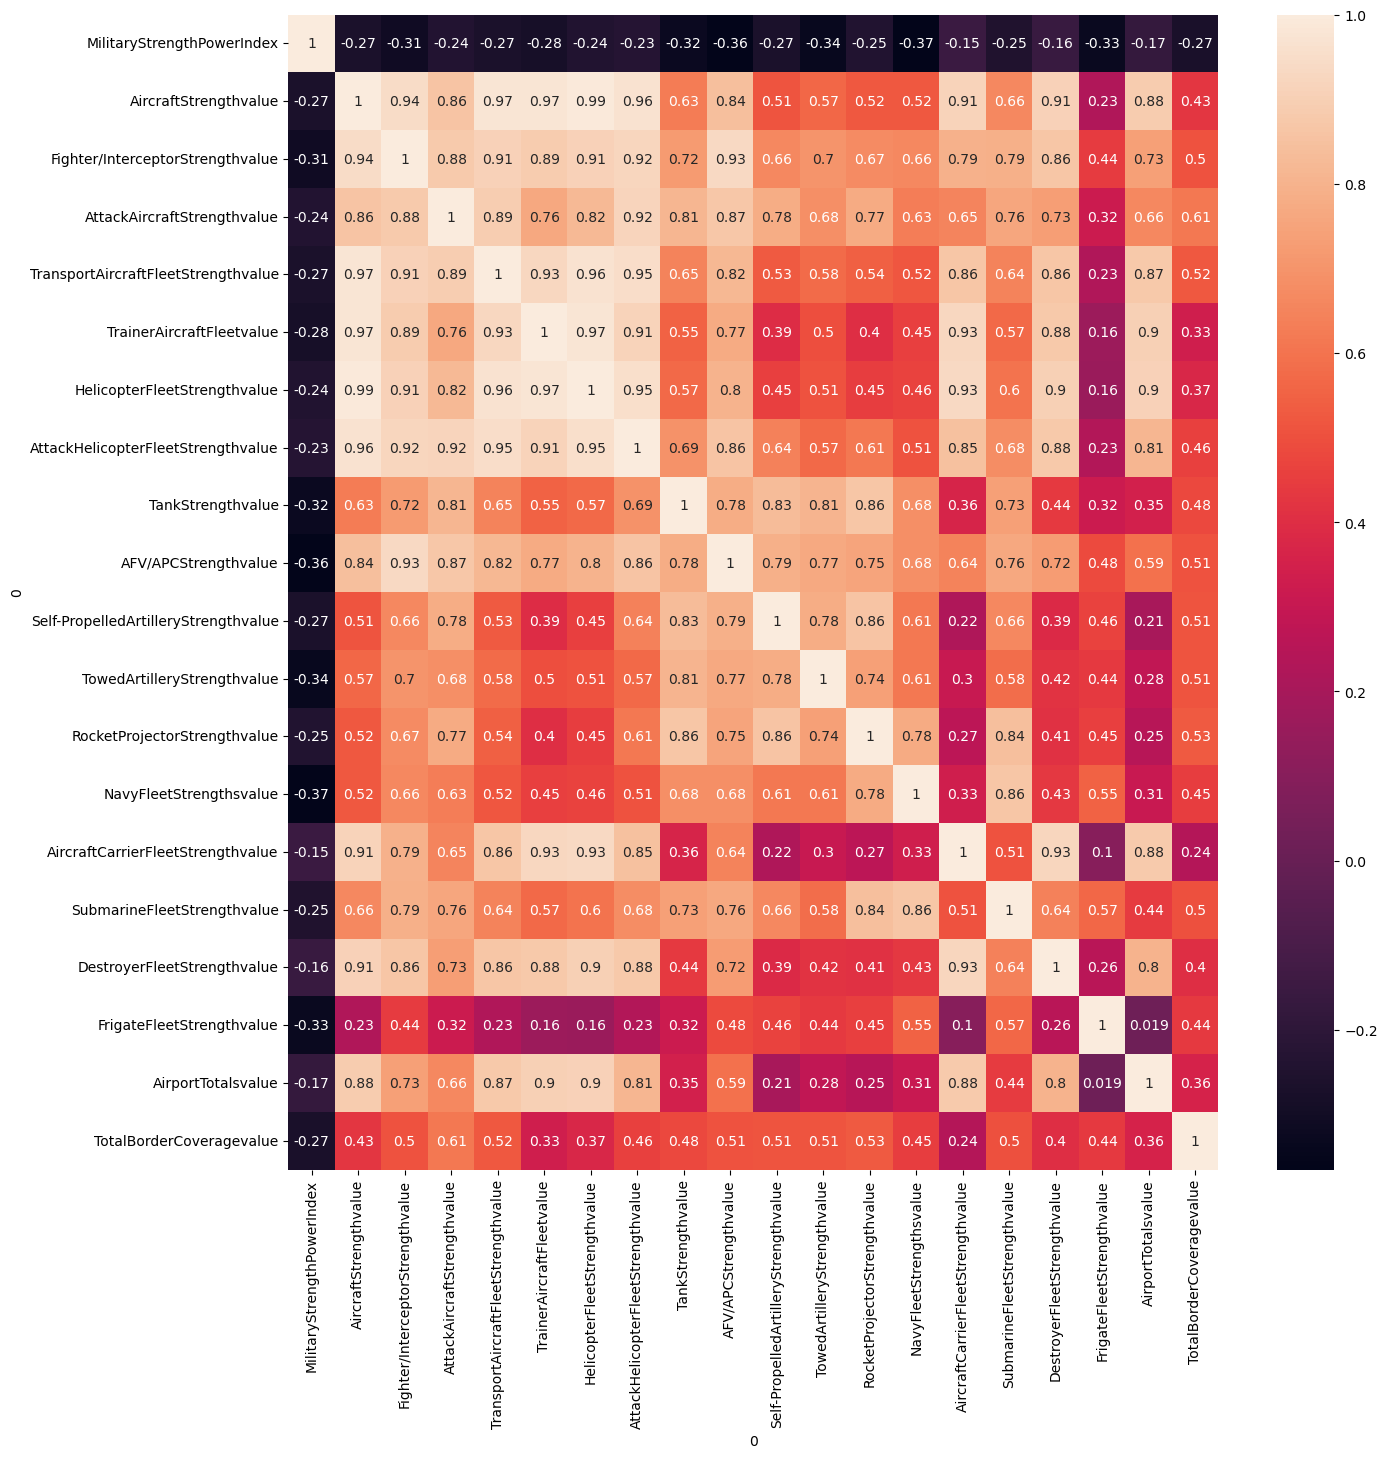

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [118]:
x=df.drop(["Countries"],axis=1)

In [119]:
x.head()

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [120]:
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod

In [121]:
#pip install yellowbrick      #veri görselleştirmeyi daha güzel yapan paket

In [122]:
from yellowbrick.cluster import KElbowVisualizer

In [123]:
km=KMeans()

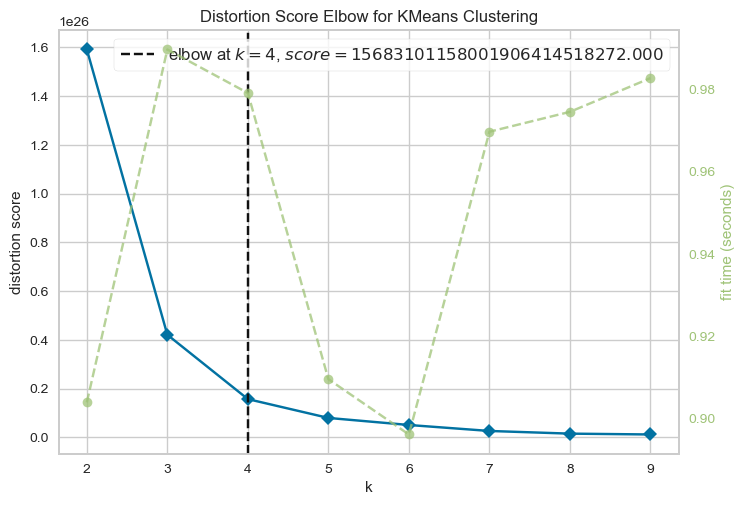

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor

In [125]:
model=KMeans(4)  #benzerliklerine göre 4 gruba ayıracağımızı tahmin ediyoruz

In [126]:
model=model.fit(x) #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

In [127]:
tahmin=model.predict(x)  #benzerliklerine göre 4 grupta tahmin etti

In [128]:
silhouette_score(x,tahmin)

0.8671436271439987

In [129]:
x['cluster']=tahmin  #x in içnde yeni bir sütun açıp 'cluster' diye isimlendiriyoruz

In [130]:
x.head()

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue,cluster
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0


In [143]:
abs(x.corr()['MilitaryStrengthPowerIndex']).sort_values(ascending=False)

0
MilitaryStrengthPowerIndex              1.000000
NavyFleetStrengthsvalue                 0.365219
AFV/APCStrengthvalue                    0.361796
TowedArtilleryStrengthvalue             0.335405
FrigateFleetStrengthvalue               0.328918
TankStrengthvalue                       0.324300
Fighter/InterceptorStrengthvalue        0.310888
TrainerAircraftFleetvalue               0.284756
OilConsumptionvalue                     0.282414
TotalBorderCoveragevalue                0.273529
Self-PropelledArtilleryStrengthvalue    0.268935
AircraftStrengthvalue                   0.267329
TransportAircraftFleetStrengthvalue     0.267104
OilProductionvalue                      0.263961
TotalSquareLandAreavalue                0.258779
SubmarineFleetStrengthvalue             0.251830
RocketProjectorStrengthvalue            0.247800
HelicopterFleetStrengthvalue            0.244545
TotalPopulationvalue                    0.242678
AttackAircraftStrengthvalue             0.241948
cluster           

In [131]:
wcss=[]  #uzaklık
for i in range(1,10):            #veriyi en az ikiye ayırıyoruz ki gruplama olsun o yüzden 1 den başladık. 0 birinci grup
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #en optimum 

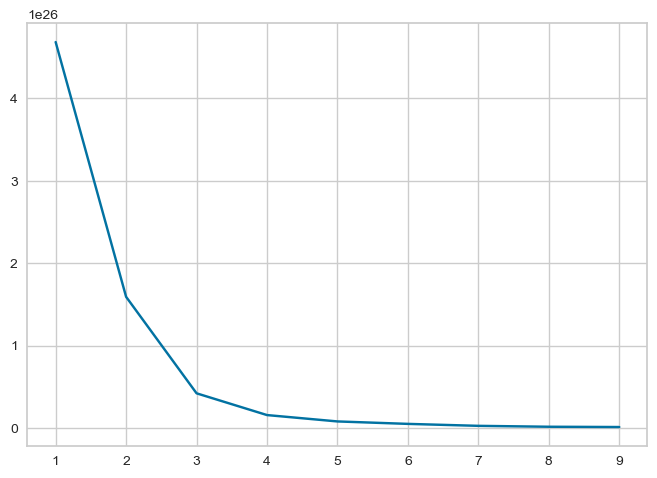

In [132]:
plt.plot(range(1,10),wcss)
#elbow dirsek metodu

In [137]:
x["cluster"].value_counts()

0    124
3      9
2      4
1      1
Name: cluster, dtype: int64

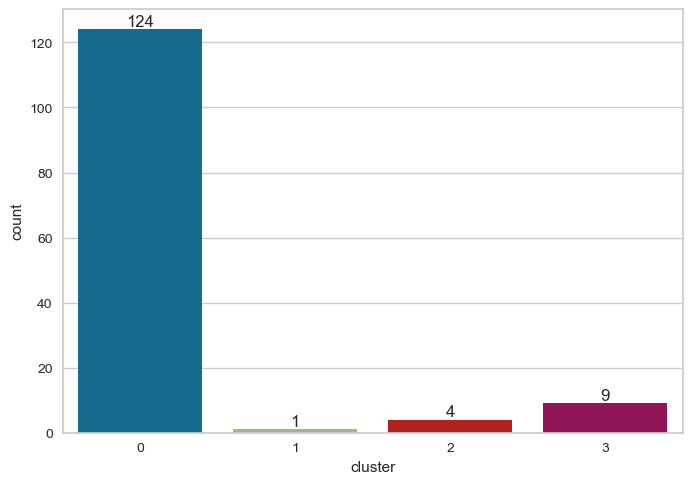

In [138]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

In [147]:
import numpy as np
import matplotlib.pyplot as plt

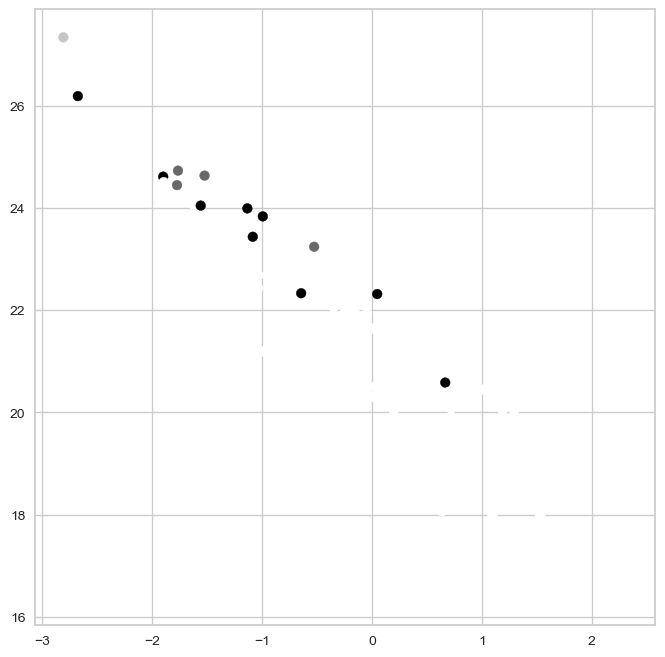

In [154]:
plt.figure(figsize=(8,8))
plt.scatter(np.log(x.MilitaryStrengthPowerIndex),np.log(x.defensespendingbudgetvalue),c=tahmin);

#Dicle hanımın çözdüğü projeden alındı - renk sistemi siyah beyaz çıktı renli yapamadım

# Hierarchical Clustering- Hiyerarşi-ikinci bir gruplama

In [155]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [156]:
data=linkage(x,method='ward',metric='euclidean')

#ward = en optimimu bulmaya yarıyor hatayı minimize ediyor
#euclidean = uzaklıkları ölçmeye yarıyor

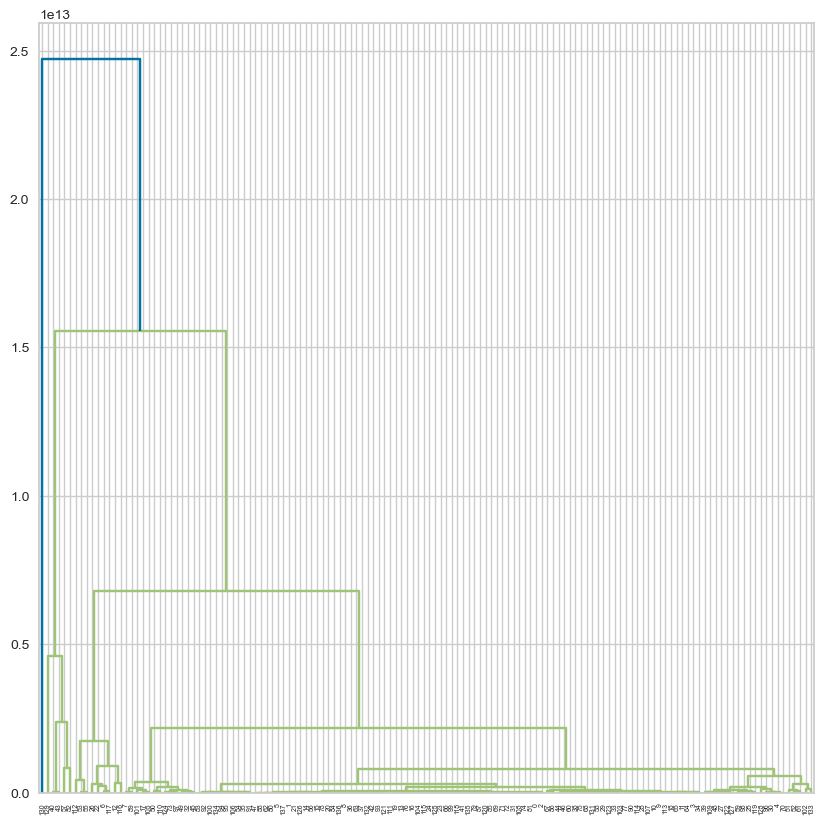

In [160]:
plt.figure(figsize=(10,10))
dendrogram(data)
plt.show()

In [165]:
x["Countries"]=df["Countries"]

#x deki sildiğimiz "Countries" tekrar df deki "Countries" e eşitlendi

In [170]:
x[x["cluster"]==0]

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue,cluster,Countries
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.000000,0.000000,0.0,0.000000,0.000000,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,3.494084e+07,652230.0,0.0,1200.0,5987.000000,0,Afghanistan
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.000000,0.000000,0.0,0.000000,0.000000,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3.057220e+06,28748.0,362.0,41.0,691.000000,0,Albania
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.000000,0.000000,6.0,0.000000,5.000000,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2381741.0,998.0,0.0,6734.000000,0,Algeria
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.000000,0.000000,0.0,0.000000,0.000000,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,3.035588e+07,1246700.0,1600.0,1300.0,5369.000000,0,Angola
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.000000,0.000000,2.0,4.000000,0.000000,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,4.469420e+07,2780400.0,4989.0,11000.0,11968.000000,0,Argentina
6,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.000000,0.382609,4.8,2.052174,3.521739,1.385000e+09,1.041000e+10,11,0.0,47500.0,0.000000e+00,1696085.0,3.038217e+06,29743.0,26.0,0.0,1570.000000,0,Armenia
8,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.000000,0.382609,4.8,2.052174,3.521739,3.380000e+09,6.308000e+11,52,14260.0,215000.0,4.300000e+07,4017691.0,8.793370e+06,83871.0,26.0,0.0,2524.000000,0,Austria
9,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.000000,0.000000,4.0,0.000000,1.000000,2.805000e+09,1.741000e+10,37,789300.0,180000.0,7.000000e+09,5042346.0,1.004652e+07,86600.0,713.0,0.0,2468.000000,0,Azerbaijan
10,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.000000,0.000000,0.0,0.000000,1.000000,1.415000e+09,5.215000e+10,4,45000.0,55000.0,1.246000e+08,806505.0,1.422659e+06,760.0,161.0,0.0,3964.224806,0,Bahrain
11,0.7066,177,44,0,11,57,67,0,276,1230,18,419,72,112.000000,0.000000,2.0,0.000000,8.000000,3.800000e+09,5.026000e+10,18,3666.0,112000.0,2.800000e+07,78913289.0,1.594530e+08,143998.0,580.0,8370.0,4413.000000,0,Bangladesh


In [167]:
x.groupby("cluster")["Countries"].unique()

#Dicle hanımın çözdüğü projeden alındı

cluster
0    [Afghanistan, Albania, Algeria, Angola, Argent...
1                                      [United States]
2       [France, Germany, Netherlands, United Kingdom]
3    [Australia, Belgium, Canada, China, Ireland, I...
Name: Countries, dtype: object